# Przykład przestrzeni stanów za pomocą klasyfikacji obrazów przy użyciu biblioteki TensorFlow
W tym przykładzie zostanie użyty zestaw danych MNIST

***Python 3.9.1***

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [7]:
# Wczytywanie danyhc MNIST
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [8]:
# Normalizacja danych (skalowanie pikseli do zakresu [0, 1])
train_images, test_images = train_images / 255.0, test_images / 255.0

In [9]:
# Definicja modelu sieci neuronowej
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Warstwa wejściowa - spłaszczenie obrazów
    keras.layers.Dense(128, activation='relu'), # Warstwa ukryta z funkcją aktywacji ReLU
    keras.layers.Dropout(0.2), # Warstwa Dropout (zapobieganie przeuczeniu)
    keras.layers.Dense(10, activation='softmax') # Warstwa wyjściowa z funkcją aktywacji softmax
])

In [12]:
# Kompilacja modelu
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [20]:
# Trenowanie modelu
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0298 - accuracy: 0.9898
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0291 - accuracy: 0.9898
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0286 - accuracy: 0.9903
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0270 - accuracy: 0.9903
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0246 - accuracy: 0.9915
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0254 - accuracy: 0.9914
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0227 - accuracy: 0.9918
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.022

In [21]:
# Ocena modelu na danych testowych
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc # Dokładnosc danych testowych

313/313 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9812


0.9811999797821045

In [22]:
# Przykład klasyfikacji obrazu z danych testowych
predictions = model.predict(test_images)
sample_index = 0
predicted_label = tf.argmax(predictions[sample_index]).numpy()
actual_label = test_labels[sample_index]

predicted_label, actual_label # Przewidziana etykieta, Rzeczywista etykieta

(7, 7)

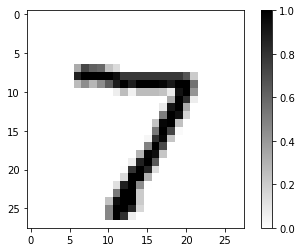

In [23]:
plt.figure()
plt.imshow(test_images[sample_index], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()